In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Create data

In [11]:
xdata = np.array([-2,-0.7,0,0.45,1.2,1.84,2.32,2.9])
ydata = np.array([0.609369,1.23905,1.77389,2.81143,1.91091,0.719576,-0.730975,-1.42001])

Show data points

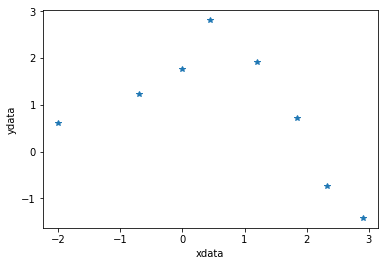

In [3]:
plt.plot(xdata,ydata,'*')
plt.xlabel('xdata')
plt.ylabel('ydata');

Define fit function

In [4]:
def func(x, p1,p2):
#  print("func",x,p1,p2)
  rs =  p1*np.cos(p2*x) + p2*np.sin(p1*x)
#  print(rs)
  return rs

Calculate and show fit parameters.  Use a starting guess of p1=1 and p2=0.2

In [5]:
popt, pcov = curve_fit(func, xdata, ydata,p0=(1.0,0.2))

In [6]:
pcov

array([[0.01323934, 0.00062201],
       [0.00062201, 0.00101333]])

In [7]:
popt

array([1.88470686, 0.68705769])

Calculate and show sum of squares of residuals since it's not given by the curve_fit function

In [8]:
p1 = popt[0]
p2 = popt[1]
residuals = ydata - func(xdata,p1,p2)
fres = sum(residuals**2)
fres

0.5152655142413002

Plot fitted curve along with data

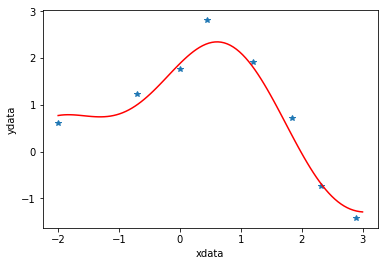

In [9]:
curvex=np.linspace(-2,3,100)
curvey=func(curvex,p1,p2)
plt.plot(xdata,ydata,'*')
plt.plot(curvex,curvey,'r')
plt.xlabel('xdata')
plt.ylabel('ydata');

# interpolation

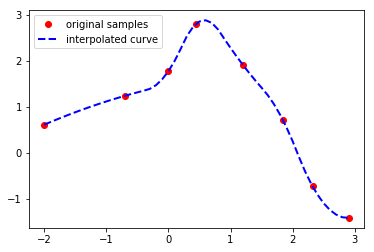

In [17]:
from scipy.interpolate import interp1d
from pylab import plot, axis, legend
import numpy as np


#xdata = np.array([-2,-1.64,-1.33,-0.7,0,0.45,1.2,1.64,2.32,2.9])
#ydata = np.array([0.699369,0.700462,0.695354,0.73905,1.97389,2.41143,1.91091,0.919576,-0.730975,-1.42001])

spline_fit = interp1d(xdata,ydata,kind=2)
xx = np.linspace(np.min(xdata),np.max(xdata), 50)
yy = spline_fit(xx)

# display the results.
plot(xdata,ydata,'ro',xx,yy, 'b--',linewidth=2)
axis('tight')
legend([ 'original samples', 'interpolated curve'])



In [38]:
df = pd.read_csv("house.txt",sep='\t')

In [39]:
df.head()

,OBS.,TOWN,TOWN#,TRACT,LON,LAT,MEDV,CMEDV,CRIM,ZN,...,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1,Nahant,0,2011,-70.955,42.2550,24.0,24.0,0.00632,18.0,...,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,2,Swampscott,1,2021,-70.950,42.2875,21.6,21.6,0.02731,0.0,...,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,3,Swampscott,1,2022,-70.936,42.2830,34.7,34.7,0.02729,0.0,...,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,4,Marblehead,2,2031,-70.928,42.2930,33.4,33.4,0.03237,0.0,...,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,5,Marblehead,2,2032,-70.922,42.2980,36.2,36.2,0.06905,0.0,...,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [46]:
import seaborn as sb

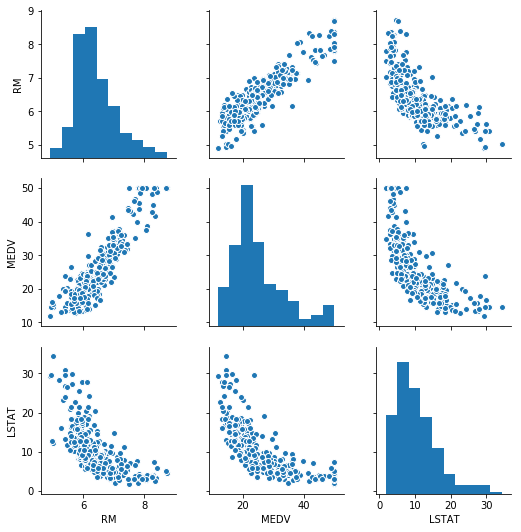

In [48]:
sb.pairplot(df[['RM','MEDV','LSTAT']])

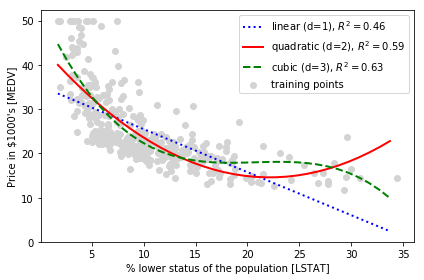

In [60]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
 
df = pd.read_csv("house.txt",sep='\t')

#X = df[['RM']].values
#y = df['MEDV'].values
X = df[['LSTAT']].values
y = df['MEDV'].values
 
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
 
regr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)
 
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
 
regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))
 
# Y = a1 + a2*x + a3*(x^2) 
# this is linear because x^2 is a feature
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))
 
regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))
 
plt.scatter(X, y, label='training points', color='lightgray')
 
plt.plot(X_fit, y_lin_fit, 
         label='linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2, 
         linestyle=':')
 
plt.plot(X_fit, y_quad_fit, 
         label='quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
         color='red', 
         lw=2,
         linestyle='-')
 
plt.plot(X_fit, y_cubic_fit, 
         label='cubic (d=3), $R^2=%.2f$' % cubic_r2,
         color='green', 
         lw=2, 
         linestyle='--')
 
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper right')
 
plt.tight_layout()
plt.show()

In [54]:
X_quad[:5,:]

array([[ 1.    ,  4.98  , 24.8004],
       [ 1.    ,  9.14  , 83.5396],
       [ 1.    ,  4.03  , 16.2409],
       [ 1.    ,  2.94  ,  8.6436],
       [ 1.    ,  5.33  , 28.4089]])

In [53]:
X[:5]

array([[4.98],
       [9.14],
       [4.03],
       [2.94],
       [5.33]])

In [59]:
X_cubic[:5,:]

array([[  1.      ,   4.98    ,  24.8004  , 123.505992],
       [  1.      ,   9.14    ,  83.5396  , 763.551944],
       [  1.      ,   4.03    ,  16.2409  ,  65.450827],
       [  1.      ,   2.94    ,   8.6436  ,  25.412184],
       [  1.      ,   5.33    ,  28.4089  , 151.419437]])